In [210]:
from radd import boldfx

In [650]:
bsim = boldfx.BOLD(model=m, sim_xbias=True) n      

In [651]:
bsim.generate_go_traces()
bsim.get_bold_dfs()

In [652]:
bsim.nogo_hemo

array([ 67.09759,  78.96298,  86.7022 ,  90.44744,  89.66257,       nan])

In [582]:
dvg[rt>=bsim.tb].shape

(4254, 575)

In [590]:
np.ravel(resp_trial_arrays)[-1].shape

(1666, 445)

In [592]:
get_nogo_traces = lambda x: [np.where(x[1]>=x[2]), True, False]

In [604]:
zipped_input_traces2[0][0]

(1666, 445)

In [605]:
zipped_input_traces2[0][0][np.where(rt[0]>=bsim.tb, True, False)]

array([[ 0.00224,  0.00448,  0.00672, ...,  0.36772,  0.37108,  0.37445],
       [-0.00224, -0.00448, -0.00672, ...,  0.15141,  0.14843,  0.15164],
       [-0.00224,  0.     ,  0.00224, ...,  0.35536,  0.35253,  0.35588],
       ..., 
       [ 0.00224,  0.00448,  0.00224, ...,  0.4357 ,  0.43911,  0.43634],
       [-0.00224,  0.     , -0.00224, ...,  0.3121 ,  0.31542,  0.31874],
       [ 0.00224,  0.     ,  0.00224, ...,  0.44188,  0.43911,  0.44253]])

In [594]:
zipped_input_traces2 = zip(bsim.dvg, rt, [bsim.tb]*len(rt))
nogo_trial_arrays = map(get_nogo_traces, zipped_input_traces)

IndexError: too many indices for array

In [593]:
# zip dvg[ncond, ntrials, ntime], bound[a_c..a_ncond], onset[tr_c..tr_ncond]
zipped_input_rt = zip(bsim.dvg, bsim.bound[:, None], bsim.onset[:,None])
# get rt for all conditions separately where boundary crossed [DVg >= a]
rt = np.asarray(map(bsim.get_rt, zipped_input_rt))

# zip dvg[ncond, ntrials, ntime], rt[rt_c..rt_ncond], [tb]*ncond
zipped_input_traces = zip(bsim.dvg, rt, [bsim.tb]*len(rt))
# boolean index traces so that DVg[RT<=TB]
resp_trial_arrays = map(bsim.get_go_traces, zipped_input_traces)
nogo_trial_arrays = map(bsim.get_nogo_traces, zipped_input_traces)
# zip dvg(resp=1), bound[a_c..a_ncond], [decay]*ncond
zipped_input_caproll = zip(resp_trial_arrays, bsim.bound, [False]*bsim.ncond)
zipped_nogo_caproll = zip(nogo_trial_arrays, bsim.bound, [False]*bsim.ncond)
# generate dataframe of capped and time-thresholded go traces

IndexError: too many indices for array

In [615]:
np.concatenate((bsim.nogo_hemo[:-1], bsim.hemo))

array([ 66.98479,  79.00537,  86.91038,  90.65694,  91.78377,  93.69489,
        92.12635,  90.15599,  86.69707,  81.17815,  75.11629])

In [620]:
rpal = lambda nc: sns.blend_palette(['#e88379', '#c0392b'], n_colors=nc)
bpal = lambda nc: sns.blend_palette(['#81aedb', '#3A539B'], n_colors=nc)
gpal = lambda nc: sns.blend_palette(['#65b88f', '#27ae60'], n_colors=nc)
ppal = lambda nc: sns.blend_palette(['#848bb6', '#663399'], n_colors=nc)
heat = lambda nc: sns.blend_palette(['#f39c12', '#c0392b'], n_colors=nc)
cool = lambda nc: sns.blend_palette(["#4168B7", "#27ae60"], n_colors=nc)
redgreen = lambda nc: sns.blend_palette(["#c0392b", "#27ae60"], n_colors=nc)
slate = lambda nc: sns.blend_palette(['#95A5A6', "#6C7A89"], n_colors=nc)

In [624]:
x=np.array(['0', '25', '50', '50', '75', '100'])
y=np.concatenate((bsim.nogo_hemo[:3], bsim.hemo[:3]))

In [656]:
bsim.plot_results(save=True)

In [648]:
x=np.array(['0', '25', '50', '50', '75', '100'])
y=np.concatenate((self.nogo_hemo[:3], self.hemo[:3]))


sns.set(style='ticks', font_scale=1.5)
ax = sns.barplot(x=np.arange(len(x)), y=y, color=redgreen(6))
ax.set_xticklabels(x)
ax.set_xlabel('pGo')
ax.set_ylabel('$\Sigma \Theta_{Go}$', fontsize=26)
ax.set_title('Drift-Rate Effect on BOLD Activity (no decay assumed)')
ax.set_ylim(50, 100)
sns.despine()


In [545]:
m.simulate(m.inits)

array([ 0.9904 ,  0.88956,  0.52641,  0.12785,  0.01381,  0.     ,
        0.497  ,  0.5095 ,  0.519  ,  0.53   ,  0.545  ,  0.53032,
        0.5405 ,  0.5485 ,  0.553  ,  0.5575 ])

In [546]:
m.inits

{'a': array([ 0.4836,  0.4836,  0.4836,  0.4836,  0.4836,  0.4836]),
 'tr': array([ 0.3375,  0.3375,  0.3375,  0.3375,  0.3375,  0.3375]),
 'v': array([ 1.08837,  1.31837,  1.54837,  1.77837,  2.00837,  2.23837]),
 'xb': array([ 1.4604,  1.4604,  1.4604,  1.4604,  1.4604,  1.4604]),
 'z': 0}

In [533]:
#m.inits['v'] = m.inits['v']+np.linspace(-.35, .01, m.ncond)
m.simulator.sim_fx(m.inits)

AttributeError: 'Model' object has no attribute 'simulator'

In [500]:
m.simulator.xtb

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [514]:
m.inits


{'a': array([ 0.4836,  0.4836,  0.4836,  0.4836,  0.4836,  0.4836]),
 'tr': array([ 0.3375,  0.3375,  0.3375,  0.3375,  0.3375,  0.3375]),
 'v': array([ 1.2628,  1.4304,  1.5705,  1.701 ,  1.8682,  1.9973]),
 'xb': array([ 1.4604,  1.4604,  1.4604,  1.4604,  1.4604,  1.4604]),
 'z': 0}

In [544]:
m.inits['v'] = m.inits['v']+np.linspace(-.22, .15, m.ncond)

In [532]:
m.inits

{'a': 0.4836, 'tr': 0.3375, 'v': 1.638366666666667, 'xb': 1.4604}

In [531]:
m = build.Model(data=prodf_store.prodata, kind='xpro', dynamic='exp', fit_whole_model=True)


      Model is prepared to fit xpro model (w/ exp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      See, it's not that simplex... 



In [570]:
x = [np.mean(np.cumsum(arr, axis=0).max().values) for arr in bsim.traces]

In [571]:
x

[92.325383976530375,
 92.928249340155389,
 90.368126436661186,
 86.864491980499679,
 81.049800953907749,
 75.125446630763562]

In [574]:
sns.barplot(x=np.arange(len(x)), y=np.array(x))

In [ ]:
sns.jointplot()

In [ ]:
sns.data=pd.DataFrame(x).T)

In [552]:
#mu = [np.mean(arr) for arr in bsim.hemodynamics]
plt.plot(x)

In [419]:
px = bsim.bold_df_list[0]
pxx = bsim.bold_df_list[-1]
pxxx = bsim.bold_df_list[3]

In [423]:
pxx.mean(axis=0)

0       0.2223
1       0.2449
2       0.2287
3       0.2448
4       0.2229
5       0.2586
6       0.2394
7       0.2358
8       0.2227
9       0.2458
10      0.2574
11      0.2322
12      0.2254
13      0.2300
14      0.2299
         ...  
1592    0.2524
1593    0.2498
1594    0.2575
1595    0.2648
1596    0.2476
1597    0.2167
1598    0.2367
1599    0.2507
1600    0.2133
1601    0.2165
1602    0.2322
1603    0.2286
1604    0.2408
1605    0.2187
1606    0.2204
dtype: float64

In [420]:
ixl = bsim.__ix_lastnum__
bb = pxx.cumsum(axis=0).apply(ixl, axis=0)
bbx = pxx.cumsum(axis=0).apply(ixl, axis=0)
bbxx = pxxx.cumsum(axis=0).apply(ixl, axis=0)

In [421]:
bbxx.mean()

122.9514775161191

In [418]:
bbx.mean()

115.09387656726842

In [416]:
bb.mean()

130.29287809046221

In [402]:
bsim.hemodynamics[3][-1]

124.4930846473009

In [307]:
x = bsim.bold_df_list[0]

In [308]:
df = bsim.bold_df_list[0]
cmu = df.cumsum()

In [342]:
hemo = np.asarray(bsim.hemodynamics)

In [431]:
mu = [np.mean(arr) for arr in bsim.hemodynamics]
plt.plot(mu)

In [236]:
cmu.last_valid_index()

573

In [316]:
bold_df_super = map(lambda x: x.cumsum(), bsim.bold_df_list)
hemodynamics = np.array(map(bsim.get_last_numeric, bold_df_super))

In [317]:
hemodynamics

array([[  2.23607e-03,   6.70820e-03,   1.34164e-02, ...,   1.30562e+02,
          1.31036e+02,           nan],
       [  2.23607e-03,   2.23607e-03,   4.47214e-03, ...,   1.37997e+02,
          1.24609e+02,           nan],
       [  2.23607e-03,   2.23607e-03,   4.47214e-03, ...,   1.30984e+02,
          1.42833e+02,           nan],
       [  2.23607e-03,   2.23607e-03,   0.00000e+00, ...,   1.39689e+02,
          1.40163e+02,           nan],
       [  2.23607e-03,   6.70820e-03,   8.94427e-03, ...,   1.34256e+02,
          1.34730e+02,           nan],
       [  2.23607e-03,   2.23607e-03,   4.47214e-03, ...,   1.31356e+02,
          1.31827e+02,           nan]])

In [ ]:
if any([s.last_valid_index(), s.first_valid_index()] is None)

In [253]:
s=pd.Series(np.arange(200))

In [255]:
x =pd.Series(np.arange(200))
if any([x.last_valid_index(), x.first_valid_index()]) is None:
      print 'OKAY'
      

In [256]:
bsim.accumulate_superposition()

AttributeError: 'BOLD' object has no attribute 'accumulate_superposition'

In [337]:
def get_last_numeric(x):
      if x.last_valid_index() is None:
            return None
      else:
            return x[x.last_valid_index()]

index_numeric = lambda d: d.cumsum().apply(func, axis=0).values
out = map(index_numeric, bsim.bold_df_list)

#cmu.apply(index_numeric, axis=0)

In [338]:
np.asarray(out)

array([ array([ 112.29086,  129.81269,  128.88025, ...,  133.07064,  116.76523,
        133.85774]),
       array([ 118.35731,  130.25543,  138.41037, ...,  127.52966,  123.62996,
         98.81408]),
       array([ 140.23277,  122.65504,  126.80294, ...,  119.38591,  129.58014,
        138.47969]),
       array([ 134.2401 ,  114.88023,  107.55263, ...,  125.951  ,  114.08195,
        142.36598]),
       array([ 128.77963,  121.24631,  119.38367, ...,  124.59818,  116.54163,
        125.93535]),
       array([ 114.96967,  114.09537,  110.91792, ...,  116.55728,  141.69516,
        109.73951])], dtype=object)

In [315]:
out

[0       132.7419
 1       101.6293
 2       113.1026
 3       128.5202
 4       121.1144
 5       132.3819
 6       125.7162
 7       145.7111
 8       127.5095
 9       126.2506
 10      121.4543
 11      121.4722
 12      125.6939
 13      134.3877
 14      105.8689
           ...   
 1007    108.2883
 1008    120.3094
 1009    128.6097
 1010    149.0205
 1011    130.1414
 1012    118.4870
 1013    115.0815
 1014    132.9253
 1015    117.8967
 1016    134.7410
 1017    107.9931
 1018    133.0773
 1019    131.9929
 1020    106.0970
 1021    128.5896
 dtype: float64, 0      124.6295
 1      132.1248
 2      121.2486
 3      103.5434
 4      110.8464
 5      117.2326
 6      133.4262
 7      138.7458
 8      129.8373
 9      112.7045
 10     125.6491
 11     136.7490
 12     129.9647
 13     114.3793
 14     110.2538
          ...   
 972    124.5736
 973    127.4492
 974    134.3899
 975    136.2101
 976    119.6050
 977    128.1088
 978    120.8393
 979    129.0122
 980    120.6113
 

In [242]:
out

[0       0.4740
 1       0.4740
 2       0.4740
 3       0.4740
 4       0.4740
 5       0.4740
 6       0.4740
 7       0.4740
 8       0.4740
 9       0.4740
 10      0.4740
 11      0.4740
 12      0.4740
 13      0.4673
 14      0.4740
          ...  
 1021    0.4740
 1022    0.4740
 1023    0.4740
 1024    0.4740
 1025    0.4740
 1026    0.4740
 1027    0.4740
 1028    0.4740
 1029    0.4740
 1030    0.4740
 1031    0.4740
 1032    0.4740
 1033    0.4740
 1034    0.4740
 1035    0.4740
 dtype: float64, 0       0.474
 1       0.474
 2       0.474
 3       0.474
 4       0.474
 5       0.474
 6       0.474
 7       0.474
 8       0.474
 9       0.474
 10      0.474
 11      0.474
 12      0.474
 13      0.474
 14      0.474
         ...  
 1024    0.474
 1025    0.474
 1026    0.474
 1027    0.474
 1028    0.474
 1029    0.474
 1030    0.474
 1031    0.474
 1032    0.474
 1033    0.474
 1034    0.474
 1035    0.474
 1036    0.474
 1037    0.474
 1038    0.474
 dtype: float64, 0     

In [ ]:
for i in range(bsim.ncond):
      bsim.bold_df_list[i]

In [86]:
from __future__ import division
from copy import deepcopy
from radd import build, fit, models, utils, vis
# from numpy import array
# m.make_simulator()
# sim = m.simulator
from numpy.random import sample as rs
from scipy.stats.mstats import mquantiles as mq
from radd.utils import drop_and_roll
from pandas import DataFrame as pDF

In [67]:
m=build.Model(data=prodf_store.prodata, depends_on={'v':'pGo'}, kind='pro')
p=dict(deepcopy(m.inits))
p['v']=np.sort(vopt.values())
m.make_simulator()
sim = m.simulator
dvg = sim.sim_fx(p, analyze=False)


      Model is prepared to fit pro model  to average data,
      allowing Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      Optimize On, Wayne 



In [47]:
x = np.where(dvg.max(axis=2).T>=p['a'], 1, 0) * dvg.T
#p, j, i = (x.shape[0]-1)/dvg.shape[0]
#xx = x.reshape(dvg.shape[0], int((x.shape[0]-1)/dvg.shape[0]), x.shape[-1])

In [27]:
dvg[:, 345]#.shape

(6, 575)

In [84]:
arr = np.array([[.5, .5], [.9, .1], [.8, .2]])
np.where(arr.max(axis=1) >= 0.9)[0]

array([1])

In [96]:
p['a']

array([ 0.4748,  0.4748,  0.4748,  0.4748,  0.4748,  0.4748])

In [23]:
dvg.shape

(6, 1666, 575)

In [33]:
x = np.where(dvg.max(axis=2)>=p['a'][:,None], p['tr'][:,None]+np.argmax((dvg.T>=p['a']).T, axis=2)*.0005, 999)
pg = np.where(x<sim.tb, 1, 0).mean(axis=1)
#len(x[(x<=sim.tb)&(x>0)]/

In [60]:
6*1666

9996

In [64]:
dvg[idx, :].shape

(5854, 575)

In [57]:
idx = np.where(x<sim.tb, True, False)

In [89]:
np.concatenate((a, a[:,::-1]),axis=1)

NameError: name 'a' is not defined

In [125]:
rt = np.asarray(map(get_rt, zip(dvg, p['a'][:, None], p['tr'][:,None])))

In [135]:
dvg[-1][np.where(rt[-1]<sim.tb, True, False)]

(1620, 575)

In [129]:
[np.where(rt<sim.tb, True, False)]

(5799, 575)

In [202]:
from __future__ import division
from copy import deepcopy
from radd import build, fit, models, utils, vis
from numpy import array

from scipy.stats.mstats import mquantiles as mq
from radd.utils import drop_and_roll, cap_bound
from pandas import DataFrame as pDF



# BUILD MODEL
m=build.Model(data=prodf_store.prodata, depends_on={'v':'pGo'}, kind='pro')
# GET PARAMS AND FILL OPT. DRIFT-RATES
p=dict(deepcopy(m.inits))
p['v']=np.sort(vopt.values())
# GENERATE MODEL SIMULATOR 
m.make_simulator()
sim = m.simulator
# SIMULATE, RETURN ACCUMULATORS
dvg = sim.sim_fx(p, analyze=False)


#############################################################
# LAMBDA FUNC: GET_RT FOR ALL BOUNDARY CROSSES, 999 OTHERWISE
# x[0] = DVg (go accumulator: all trials in single condition)
# x[1] = a   (boundary, single condition)
# x[2] = tr  (onset time, cond i)
get_rt = lambda x: np.where(x[0].max(axis=1)>=x[1], x[2]+np.argmax(x[0]>=x[1], axis=1)*.0005, 999)

# MAP LAMBDA GET_RT FOR ALL CONDITIONS SEPARATELY (NECESSARY HERE)
# Cannot vectorize (without masking) due to change ntrials that meet criteria
# i.e. size of trial dimension [1] is not constant for condition dimension [0]
zipped_input_rt = zip(dvg, p['a'][:, None], p['tr'][:,None])
rt = np.asarray(map(get_rt, zipped_input_rt))


      Model is prepared to fit pro model  to average data,
      allowing Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      What is this... a model for ANTS!? 



In [148]:
xx.shape

(575, 125)

In [174]:
xx = tracedf_list[3]
#cap_go_traces = lambda x: x[xx>=x[1]]=np.nan

In [175]:
df = xx.copy()
a = p['a'][0]
df[df>=a].values.fill(np.nan)

In [177]:
xxx = df.values
np.argmax(xxx, axis=0)

array([567, 550, 570, ..., 574, 574, 574])

In [190]:
np.concatenate((xxx, xxx[:, ::-1]), axis=1)

array([[ 0.00224,  0.00224,  0.00224, ...,  0.00224,  0.00224,  0.00224],
       [ 0.00447,  0.00447,  0.00447, ...,  0.00447,  0.00447,  0.00447],
       [ 0.00224,  0.00224,  0.00224, ...,  0.00224,  0.00224,  0.00224],
       ..., 
       [ 0.57467,  0.47181,  0.52548, ...,  0.52548,  0.47181,  0.57467],
       [ 0.57243,  0.47405,  0.52324, ...,  0.52324,  0.47405,  0.57243],
       [ 0.57467,  0.47628,  0.521  , ...,  0.521  ,  0.47628,  0.57467]])

In [188]:
np.argmax()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [198]:
x = bold_up_arrays[0]
x[x>=a] = np.nan

In [200]:
plt.plot(x[0])

In [208]:
def 



      cap = p['a']
      ncond = len(cap)

      ###############################################################
      # LAMBDA FUNC: GET_GO_TRACES FOR ALL THAT CROSS BOUND BEFORE TB
      # x[0] = DVg (go accumulator: all trials in single condition)
      # x[1] = RT  (all trials in single condition)
      # x[1] = timeboundary (simulator.tb)
      get_go_traces = lambda x: x[0][np.where(x[1]<=x[2], True, False)]

      ###################################################################################
      # LAMBDA FUNC: CAP_ROLL_TRACES cap traces at bound and roll nans to back (opt. decay)
      # x[0] = DVg (go accumulator: all trials in single condition)
      # x[1] = a (boundary, single condition)
      # x[2] = BOOL (decay if True, <default False>)
      cap_roll_traces = lambda x: drop_and_roll(cap_bound(x[0], x[1], x[2]))

      # Boolean slice trials from Original DVg accum. based on RT<999
      # rt[rt<sim.tb] == ( [ DVg >= a] && [ DVg < timebound ] )
      # !! IMPORTANT !! cannot be done by vectorizing (w/out masked arr) 
      # map GET_GO_TRACES lambda func to generate list of pandas 
      # dataframes ----> DFi: ntimepoints (ROWS) x ntrials (COLS)
      # Each DF in list contains all the accumulators (trials x time) 
      # for a given pGO condition. That DF can then be cumsum'd and agg.
      zipped_input_traces = zip(dvg, rt, [sim.tb]*len(rt))
      resp_trial_arrays = map(get_go_traces, zipped_input_traces)

      zipped_input_caproll = zip(resp_trial_arrays, cap, [decay]*ncond)
      bold_df_list = map(cap_roll_traces, zipped_input_caproll)

      return bold_df_list

In [209]:
c = ppal(len(bold_df))
for i in range(len(bold_df)):
      plt.plot(bold_df[i].iloc[:, 0], color=c[i])

In [91]:
arr = [pDVG[pDVG.max(axis=1)>=p['a'][i]] for i, pDVG in enumerate(dvg)]
arr2 = [np.argmax(a)]
arr2 = [pDF(np.concatenate((a, a[:,::-1]),axis=1).T) for a in arr]

In [95]:
for i in xrange(len(arr2)):
      plt.plot(arr2[i].iloc[:, 1])

In [87]:
gos = [pDF((pDVG[pDVG.max(axis=1)>=p['a'][i]]).T) for i, pDVG in enumerate(dvg)]

In [88]:
gos[1]

,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
0,-0.0022,0.0022,0.0022,-0.0022,0.0022,0.0022,-0.0022,0.0022,0.0022,0.0022,...,0.0022,0.0022,0.0022,0.0022,0.0022,0.0022,0.0022,-0.0022,0.0022,0.0022
1,0.0000,0.0000,0.0045,0.0000,0.0045,0.0045,0.0000,0.0045,0.0045,0.0000,...,0.0000,0.0045,0.0045,0.0045,0.0045,0.0045,0.0000,0.0000,0.0000,0.0045
2,0.0022,0.0022,0.0022,-0.0022,0.0067,0.0067,0.0022,0.0067,0.0022,-0.0022,...,-0.0022,0.0067,0.0022,0.0067,0.0067,0.0022,0.0022,-0.0022,0.0022,0.0022
3,0.0000,0.0000,0.0045,0.0000,0.0089,0.0089,0.0045,0.0045,0.0045,0.0000,...,0.0000,0.0045,0.0045,0.0089,0.0089,0.0045,0.0045,0.0000,0.0045,0.0045
4,0.0022,0.0022,0.0067,-0.0022,0.0112,0.0112,0.0067,0.0022,0.0022,0.0022,...,0.0022,0.0067,0.0067,0.0112,0.0067,0.0022,0.0067,0.0022,0.0022,0.0067
5,0.0045,0.0045,0.0089,0.0000,0.0134,0.0134,0.0045,0.0000,0.0000,0.0045,...,0.0045,0.0045,0.0089,0.0089,0.0089,0.0045,0.0089,0.0045,0.0045,0.0089
6,0.0067,0.0022,0.0112,-0.0022,0.0157,0.0157,0.0022,-0.0022,-0.0022,0.0022,...,0.0067,0.0067,0.0112,0.0112,0.0067,0.0067,0.0112,0.0067,0.0067,0.0067
7,0.0089,0.0045,0.0134,0.0000,0.0134,0.0134,0.0045,0.0000,-0.0045,0.0045,...,0.0089,0.0089,0.0089,0.0089,0.0045,0.0089,0.0134,0.0089,0.0089,0.0089
8,0.0112,0.0022,0.0157,0.0022,0.0157,0.0157,0.0067,-0.0022,-0.0022,0.0022,...,0.0112,0.0112,0.0112,0.0112,0.0022,0.0112,0.0157,0.0112,0.0067,0.0112
9,0.0089,0.0000,0.0134,0.0045,0.0134,0.0179,0.0089,0.0000,0.0000,0.0045,...,0.0089,0.0089,0.0134,0.0089,0.0000,0.0134,0.0179,0.0134,0.0089,0.0089


In [40]:
np.where(x<sim.tb, 1, 0).mean(axis=1)#x[x<sim.tb]

array([ 0.07203,  0.2521 ,  0.55222,  0.7425 ,  0.92857,  0.96639])

In [29]:
x = dvg[:, np.any((dvg.T>=p['a']).T, axis=1), :]

IndexError: too many indices for array

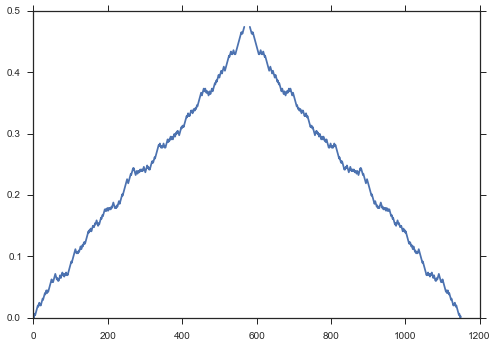

In [149]:
plt.plot(np.concatenate((xxx, xxx[:, :, ::-1]), axis=2)[0,0,:])

In [367]:
6*1666

9996

In [ ]:
dvg[np.argmax(dvg.T>=p['a'], axis=2)]

In [372]:
dvg[nt(np.floor(6143/6)),575]

IndexError: index 6 is out of bounds for axis 0 with size 6

In [362]:
dvg[np.any((dvg.T>=p['a']).T, axis=2)].shape

(6143, 575)

In [100]:
x = dvg[np.any((dvg.T>=p['a']).T, axis=2)]

1024.1666666666667

In [108]:
xxx = np.where((dvg.T<=p['a']), 1, np.nan).T * dvgx

ValueError: operands could not be broadcast together with shapes (6,1666,575) (6145,575) 

In [117]:
dvg.shape

(6, 1666, 575)

In [122]:
rt

(6, 1666)

In [145]:
p['v']=

array([ 1.6961,  1.6961,  1.6961,  1.6961,  1.6961,  1.6961])

In [133]:

rt.max()

0.55950000000000011

In [144]:
rt - p['tr']

array([[ 0.259,  0.   ,  0.26 ,  0.255,  0.   ,  0.274],
       [ 0.24 ,  0.   ,  0.287,  0.281,  0.244,  0.   ],
       [ 0.   ,  0.285,  0.268,  0.25 ,  0.261,  0.225],
       ..., 
       [ 0.282,  0.255,  0.276,  0.247,  0.   ,  0.28 ],
       [ 0.253,  0.   ,  0.   ,  0.   ,  0.26 ,  0.   ],
       [ 0.273,  0.281,  0.   ,  0.   ,  0.   ,  0.   ]])

In [148]:
rt = (p['tr'] + (np.argmax((dvg.T>=p['a']).T, axis=2).T*.0005))
rt[rt<=sim.tb]

(9996,)

In [107]:
#dvgx = dvg[np.any((dvg.T>=p['a']).T, axis=2)]

xxx = np.where((dvg.T<=p['a']).T, 1, np.nan) * dvgx
x = np.concatenate((xxx, xxx[:, :, ::-1]), axis=2)
#xdf = pd.DataFrame(x.reshape(x.shape[0]*x.shape[1], x.shape[2]).T)

ValueError: operands could not be broadcast together with shapes (6,1666,575) (6145,575) 

In [264]:
xdf = xdf.interpolate()

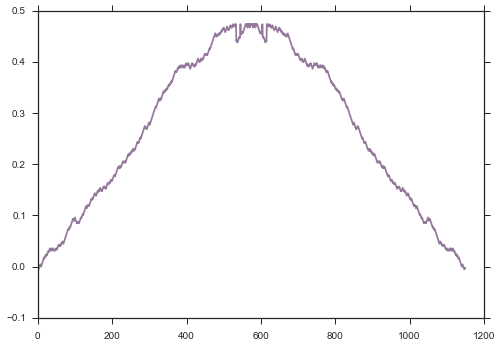

In [280]:
plt.plot(xdf.iloc[:,-1], alpha=a[-1], color=c[-1])

In [304]:
x.reshape(x.shape[0]*x.shape[1], x.shape[2]).T

array([[ 0.00223607,  0.00223607,  0.00223607, ...,  0.00223607,
        -0.00223607, -0.00223607],
       [ 0.        ,  0.00447214,  0.00447214, ...,  0.00447214,
         0.        , -0.00447214],
       [ 0.00223607,  0.0067082 ,  0.00223607, ...,  0.0067082 ,
         0.00223607, -0.00223607],
       ..., 
       [ 0.00223607,  0.0067082 ,  0.00223607, ...,  0.0067082 ,
         0.00223607, -0.00223607],
       [ 0.        ,  0.00447214,  0.00447214, ...,  0.00447214,
         0.        , -0.00447214],
       [ 0.00223607,  0.00223607,  0.00223607, ...,  0.00223607,
        -0.00223607, -0.00223607]])

(0, 0.6)

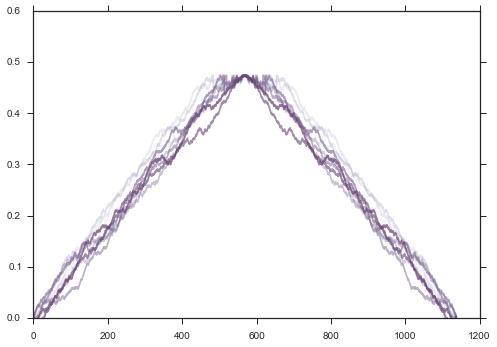

In [301]:
dvg = dvg[np.any((dvg.T>=p['a']).T, axis=2)]
#dvgx = x.reshape(,int(6204/6),575)
xxx = np.where(dvgx.T<=p['a'], 1, np.nan).T * dvgx
x = np.concatenate((xxx, xxx[:, :, ::-1]), axis=2)
xdf = drop_and_roll(pd.DataFrame(x.reshape(x.shape[0]*x.shape[1], x.shape[2]).T))

a = np.linspace(0,.7, 10)
c = ppal(10)
for i in xrange(10):
      plt.plot(xdf.iloc[:,i], alpha=a[i], color=c[i])
      

#plt.gca().set_ylim(0,.6)

In [260]:
x = np.concatenate((xxx, xxx[:, :, ::-1]), axis=2)
xdf = pd.DataFrame(x.reshape(x.shape[0]*x.shape[1], x.shape[2]).T)
x

True

In [192]:
np.argmin(xxx[:,:,1:-1], axis=2)

(1034, 6)

In [176]:
ind = np.where(~np.isnan(xxx))[0]
first, last = ind[0], ind[-1]
xxx[:first] = xxx[first]
xxx[last + 1:] = xxx[last]

In [183]:
xx = np.delete(xxx,xxx[np.isnan(xxx)], axis=2)

(6, 1034, 575)

In [296]:
xdf = drop_and_roll(xdf)

In [302]:
xdf.iloc[int(len(xdf)/2)-10:int(len(xdf)/2)+10, 0]

565    0.4696
566    0.4718
567    0.4740
568    0.4740
569    0.4740
570    0.4740
571    0.4718
572    0.4696
573    0.4673
574    0.4651
575    0.4629
576    0.4651
577    0.4629
578    0.4651
579    0.4629
580    0.4606
581    0.4584
582    0.4562
583    0.4539
584    0.4517
Name: 0, dtype: float64

In [ ]:
plt.plot

In [282]:
bold = np.concatenate((xxx, xxx[:,:,::-1]), axis=2)
mu = np.cumsum(bold, axis=2)


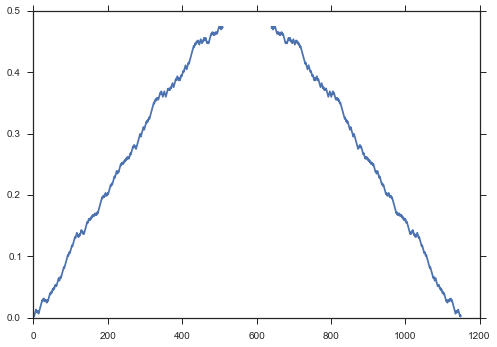

In [283]:
plt.plot(bold[0,2,:])

In [128]:
mu.max(axis=2).shape

(6, 1034)

In [131]:
np.max(bold[:, :2, :], axis=2)

array([[ 0.48522675,  0.48522675],
       [ 0.47851855,  0.49864316],
       [ 0.51429563,  0.49417102],
       [ 0.49193496,  0.53442025],
       [ 0.52994811,  0.53442025],
       [ 0.56125306,  0.50311529]])

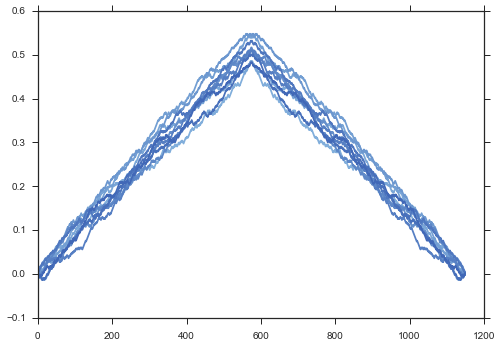

In [123]:
c = bpal(10)
for i in xrange(10):
      plt.plot(bold[0,2,:], )

In [53]:
((dvg.T>=p['a']).T).shape

(6, 1666, 575)

In [ ]:
np.argmax((dvg.T>=p['a']).T, axis=2)

In [49]:
np.argmax(dvg.T<=p['a'], axis=2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 3, 2, 2],
       [0, 0, 1, ..., 3, 2, 2],
       [0, 0, 1, ..., 3, 2, 2]])

In [57]:
dvg = np.cumsum(dvg.T * np.where(dvg.T<=p['a'], 1, np.nan))

In [41]:
z = np.zeros_like(dvg)
np.argmax(dvg.T<=p['a'], axis=2)

0.0

In [26]:
bold = np.concatenate((dvg, dvg[:,:,::-1]), axis=2)
mu = np.cumsum(bold, axis=2).mean(axis=)


(6, 1666, 1150)

In [33]:
x = np.cumsum(mu[0,0,:])